In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

In [3]:
pop = pd.read_csv('../data/population_Final.csv',encoding='EUC-KR')

In [17]:
cgv = pd.read_excel('../data/전국CGV매장.xlsx',encoding='EUC-KR')

In [18]:
cgv

,구분,합계
0,서울,28
1,부산,11
2,대구,9
3,인천,8
4,광주,7
5,대전,7
6,울산,2


In [19]:
cgv = cgv.rename(columns={'구분':'행정구역'})
cgv

,행정구역,합계
0,서울,28
1,부산,11
2,대구,9
3,인천,8
4,광주,7
5,대전,7
6,울산,2


In [20]:
pop

,행정구역,인구수
1,서울,9577030
2,부산,3385964
3,대구,2927925
4,인천,2428301
5,광주,1469981
6,대전,1450439
7,울산,1144299


In [21]:
#pop = pop.drop(0,axis=0)

In [22]:
pop

,행정구역,인구수
1,서울,9577030
2,부산,3385964
3,대구,2927925
4,인천,2428301
5,광주,1469981
6,대전,1450439
7,울산,1144299


In [24]:
cgv = pd.merge(cgv, pop, on='행정구역')
cgv

,행정구역,합계,인구수
0,서울,28,9577030
1,부산,11,3385964
2,대구,9,2927925
3,인천,8,2428301
4,광주,7,1469981
5,대전,7,1450439
6,울산,2,1144299


In [25]:
# 전체 매장 수에서 차지하는 비율
cgv['비율'] = cgv['합계'] / cgv['합계'].sum() * 100

In [26]:
cgv

,행정구역,합계,인구수,비율
0,서울,28,9577030,38.888889
1,부산,11,3385964,15.277778
2,대구,9,2927925,12.500000
3,인천,8,2428301,11.111111
4,광주,7,1469981,9.722222
5,대전,7,1450439,9.722222
6,울산,2,1144299,2.777778


In [27]:
cgv['평균인구대비'] = cgv['합계'] / cgv['인구수'].mean() * 100

In [28]:
cgv

,행정구역,합계,인구수,비율,평균인구대비
0,서울,28,9577030,38.888889,0.000876
1,부산,11,3385964,15.277778,0.000344
2,대구,9,2927925,12.500000,0.000281
3,인천,8,2428301,11.111111,0.000250
4,광주,7,1469981,9.722222,0.000219
5,대전,7,1450439,9.722222,0.000219
6,울산,2,1144299,2.777778,0.000063


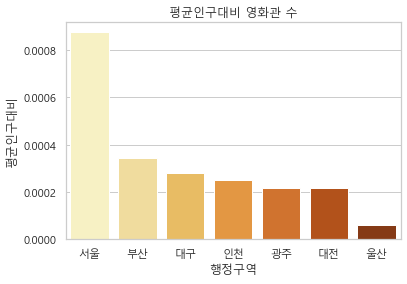

In [36]:
sns.barplot('행정구역','평균인구대비', data = cgv, palette = 'YlOrBr')
plt.title('평균인구대비 영화관 수')
plt.show()

In [37]:
cgv.to_csv('cgv_LOOK.csv',encoding='EUC-KR',index=False)